In [1]:
# Keras
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation
from keras.layers import Embedding

# NLTK
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

## Plot
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import matplotlib as plt

import re
import string
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt 

In [3]:
df1 = pd.read_csv("Sarcastic.csv", index_col=False)
df2 = pd.read_csv("Non-Sarcastic.csv", index_col=False)

In [4]:
df = pd.concat([df1,df2])

In [5]:
df = df.sample(frac = 1)

In [6]:
df.head()

,Label,date,Tweet
8373,0,2022-10-21 15:40:00+00:00,@GlobalEdmonton Well that’s not going to cause...
6960,1,2016-12-06 02:05:11+00:00,To think I used to listen to Carly Rae Jepsen ...
474,0,2022-12-01 15:00:15+00:00,"Funny postcard, set of 4, ""Earth sucks. It's t..."
1807,1,2021-05-13 07:36:15+00:00,@RachelRoseReid @maxdavie As a professional th...
4785,0,2022-11-09 13:02:58+00:00,"""Oh, more than you could ever know,"" she repli..."


In [7]:
df = df.drop('date', axis=1)
df.reset_index(inplace=True, drop=True)

In [8]:
df

,Label,Tweet
0,0,@GlobalEdmonton Well that’s not going to cause...
1,1,To think I used to listen to Carly Rae Jepsen ...
2,0,"Funny postcard, set of 4, ""Earth sucks. It's t..."
3,1,@RachelRoseReid @maxdavie As a professional th...
4,0,"""Oh, more than you could ever know,"" she repli..."
...,...,...
16481,1,@davidnelsonORL @JarredRozelle @DisneyParks @D...
16482,1,Laksh’s choreo was wayyy more intricate than a...
16483,0,@ThatAstrosGirl He looks like he doesn't turn ...
16484,0,"Anti-Government, Anti-Democrat, Anti-GOP, Brea..."


In [9]:
df.to_csv('Sarcastic_Dataset.csv',index=False)

In [2]:
df = pd.read_csv("Sarcastic_Dataset.csv")

In [7]:
df["Label"].value_counts()

0    8954
1    7532
Name: Label, dtype: int64

In [8]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

In [9]:
df['Tweet_PP'] = np.vectorize(remove_pattern)(df['Tweet'], "@[\w]*") 
df.head()

,Label,Tweet,Tweet_PP
0,0,@GlobalEdmonton Well that’s not going to cause...,Well that’s not going to cause any problems… ...
1,1,To think I used to listen to Carly Rae Jepsen ...,To think I used to listen to Carly Rae Jepsen ...
2,0,"Funny postcard, set of 4, ""Earth sucks. It's t...","Funny postcard, set of 4, ""Earth sucks. It's t..."
3,1,@RachelRoseReid @maxdavie As a professional th...,As a professional this would really wind me ...
4,0,"""Oh, more than you could ever know,"" she repli...","""Oh, more than you could ever know,"" she repli..."


In [10]:
df['Tweet_PP'] = df['Tweet_PP'].str.replace("[^a-zA-Z#]", " ")
df.head()

C:\Users\manoj\AppData\Local\Temp\ipykernel_10852\3185645739.py:1: FutureWarning:

The default value of regex will change from True to False in a future version.



,Label,Tweet,Tweet_PP
0,0,@GlobalEdmonton Well that’s not going to cause...,Well that s not going to cause any problems ...
1,1,To think I used to listen to Carly Rae Jepsen ...,To think I used to listen to Carly Rae Jepsen ...
2,0,"Funny postcard, set of 4, ""Earth sucks. It's t...",Funny postcard set of Earth sucks It s t...
3,1,@RachelRoseReid @maxdavie As a professional th...,As a professional this would really wind me ...
4,0,"""Oh, more than you could ever know,"" she repli...",Oh more than you could ever know she repli...


In [11]:
df['Tweet_PP'] = df['Tweet_PP'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df.head()

,Label,Tweet,Tweet_PP
0,0,@GlobalEdmonton Well that’s not going to cause...,Well that going cause problems #sarcasm
1,1,To think I used to listen to Carly Rae Jepsen ...,think used listen Carly Jepsen sarcastic manne...
2,0,"Funny postcard, set of 4, ""Earth sucks. It's t...",Funny postcard Earth sucks peopley humorous po...
3,1,@RachelRoseReid @maxdavie As a professional th...,professional this would really wind polite sar...
4,0,"""Oh, more than you could ever know,"" she repli...",more than could ever know replied when asked w...


In [12]:
Tokens = df['Tweet_PP'].apply(lambda x: x.split()) # tokenizing
Tokens.head()

0       [Well, that, going, cause, problems, #sarcasm]
1    [think, used, listen, Carly, Jepsen, sarcastic...
2    [Funny, postcard, Earth, sucks, peopley, humor...
3    [professional, this, would, really, wind, poli...
4    [more, than, could, ever, know, replied, when,...
Name: Tweet_PP, dtype: object

In [13]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

Tokens = Tokens.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

In [14]:
for i in range(len(Tokens)):
    Tokens[i] = ' '.join(Tokens[i])
    
df['Tweet_PP'] = Tokens

In [15]:
df['Tweet_PP'].head()

0                   well that go caus problem #sarcasm
1    think use listen carli jepsen sarcast manner m...
2    funni postcard earth suck peopley humor postca...
3    profession thi would realli wind polit sarcast...
4    more than could ever know repli when ask what ...
Name: Tweet_PP, dtype: object

In [16]:
vocabulary_size = len(df['Tweet'])
tokenizer = Tokenizer(num_words= vocabulary_size)
tokenizer.fit_on_texts(df['Tweet_PP'])

sequences = tokenizer.texts_to_sequences(df['Tweet_PP'])
data = pad_sequences(sequences, maxlen=50)

In [17]:
data.shape

(16486, 50)

In [18]:
model_lstm = Sequential()
model_lstm.add(Embedding(vocabulary_size, 100, input_length=50))
model_lstm.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
model_lstm.fit(data, df['Label'], validation_split=0.3, epochs=3)

Epoch 1/3
361/361 [==============================] - 26s 57ms/step - loss: 0.2319 - accuracy: 0.9160 - val_loss: 0.1522 - val_accuracy: 0.9563
Epoch 2/3
361/361 [==============================] - 23s 64ms/step - loss: 0.1021 - accuracy: 0.9677 - val_loss: 0.1629 - val_accuracy: 0.9482
Epoch 3/3
361/361 [==============================] - 26s 73ms/step - loss: 0.0649 - accuracy: 0.9792 - val_loss: 0.1776 - val_accuracy: 0.9470


In [20]:
def create_conv_model():
    model_conv = Sequential()
    model_conv.add(Embedding(vocabulary_size, 100, input_length=50))
    model_conv.add(Dropout(0.2))
    model_conv.add(Conv1D(64, 5, activation='relu'))
    model_conv.add(MaxPooling1D(pool_size=4))
    model_conv.add(LSTM(100))
    model_conv.add(Dense(1, activation='sigmoid'))
    model_conv.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model_conv 

In [21]:
model_conv = create_conv_model()
model_conv.fit(data, df['Label'], validation_split=0.3, epochs = 3)

Epoch 1/3
361/361 [==============================] - 14s 30ms/step - loss: 0.3912 - accuracy: 0.8133 - val_loss: 0.3290 - val_accuracy: 0.8534
Epoch 2/3
361/361 [==============================] - 10s 28ms/step - loss: 0.2270 - accuracy: 0.9036 - val_loss: 0.3454 - val_accuracy: 0.8451
Epoch 3/3
361/361 [==============================] - 10s 29ms/step - loss: 0.1469 - accuracy: 0.9391 - val_loss: 0.4028 - val_accuracy: 0.8415


In [22]:
embeddings_index = dict()
f = open('glove.6B.100d.txt', encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [23]:
# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocabulary_size, 100))
for word, index in tokenizer.word_index.items():
    if index > vocabulary_size - 1:
        break
    else:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector

In [24]:
model_glove = Sequential()
model_glove.add(Embedding(vocabulary_size, 100, input_length=50, weights=[embedding_matrix], trainable=False))
model_glove.add(Dropout(0.2))
model_glove.add(Conv1D(64, 5, activation='relu'))
model_glove.add(MaxPooling1D(pool_size=4))
model_glove.add(LSTM(100))
model_glove.add(Dense(1, activation='sigmoid'))
model_glove.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
model_glove.fit(data, df['Label'], validation_split=0.3, epochs = 3)

Epoch 1/3
361/361 [==============================] - 8s 14ms/step - loss: 0.5351 - accuracy: 0.7176 - val_loss: 0.5417 - val_accuracy: 0.7064
Epoch 2/3
361/361 [==============================] - 5s 13ms/step - loss: 0.4619 - accuracy: 0.7742 - val_loss: 0.5105 - val_accuracy: 0.7396
Epoch 3/3
361/361 [==============================] - 5s 15ms/step - loss: 0.4226 - accuracy: 0.7943 - val_loss: 0.5536 - val_accuracy: 0.7111


In [26]:
lstm_embds = model_lstm.layers[0].get_weights()[0]

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(lstm_embds)
principalDf = pd.DataFrame(data = principalComponents)
finalDf = pd.concat([principalDf, df[['Label']]], axis = 1)
finalDf

,0,1,Label
0,0.179673,0.163414,0
1,0.978540,0.442109,1
2,-0.733178,0.580477,0
3,-0.324409,-0.167928,1
4,0.263216,-0.029452,0
...,...,...,...
16481,-0.178823,-0.108866,1
16482,-0.154801,-0.003742,1
16483,-0.167298,-0.043466,0
16484,-0.145091,0.026605,0


In [29]:
X = finalDf.drop('Label',axis=1).values
Y = finalDf['Label'].values

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3,random_state=0)

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.55      1.00      0.71      2705
           1       0.80      0.00      0.00      2241

    accuracy                           0.55      4946
   macro avg       0.67      0.50      0.36      4946
weighted avg       0.66      0.55      0.39      4946

[[2704    1]
 [2237    4]]
accuracy is 0.547513141932875


In [32]:
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.55      1.00      0.71      2705
           1       0.50      0.00      0.01      2241

    accuracy                           0.55      4946
   macro avg       0.52      0.50      0.36      4946
weighted avg       0.53      0.55      0.39      4946

[[2698    7]
 [2234    7]]
accuracy is 0.5469065911847958


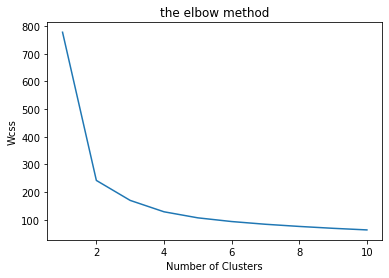

In [33]:
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()

In [34]:
#  Calculate the silhouette score for the above clustering

nclusters = 3  # this is the k in kmeans
km = KMeans(n_clusters=nclusters)
km.fit(X)

y_cluster_kmeans = km.predict(X)
from sklearn import metrics
score = metrics.silhouette_score(X, y_cluster_kmeans)
print(score)

0.42622826


In [35]:
conv_embds = model_conv.layers[0].get_weights()[0]

In [36]:
from sklearn.decomposition import PCA
pca2 = PCA(n_components=2)
principalComponents2 = pca2.fit_transform(conv_embds)
principalDf2 = pd.DataFrame(data = principalComponents2)
finalDf2 = pd.concat([principalDf2, df[['Label']]], axis = 1)
finalDf2

,0,1,Label
0,0.081021,-0.073713,0
1,0.942296,0.263389,1
2,0.028877,0.352903,0
3,-0.427108,-0.181169,1
4,0.131485,0.003306,0
...,...,...,...
16481,-0.175337,-0.054174,1
16482,-0.223237,0.083555,1
16483,-0.179023,0.145715,0
16484,0.100608,-0.044347,0


In [37]:
X = finalDf2.drop('Label',axis=1).values
Y = finalDf2['Label'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3,random_state=0)

In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.55      0.99      0.71      2705
           1       0.53      0.02      0.03      2241

    accuracy                           0.55      4946
   macro avg       0.54      0.50      0.37      4946
weighted avg       0.54      0.55      0.40      4946

[[2675   30]
 [2207   34]]
accuracy is 0.5477153255155681


In [39]:
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.55      1.00      0.71      2705
           1       0.50      0.00      0.00      2241

    accuracy                           0.55      4946
   macro avg       0.52      0.50      0.36      4946
weighted avg       0.53      0.55      0.39      4946

[[2700    5]
 [2236    5]]
accuracy is 0.5469065911847958


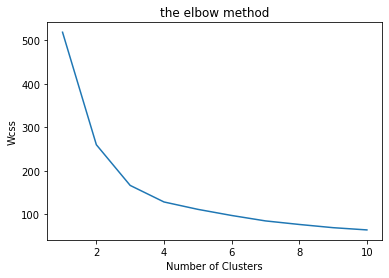

In [40]:
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()

In [41]:
nclusters = 3  # this is the k in kmeans
km = KMeans(n_clusters=nclusters)
km.fit(X)

y_cluster_kmeans = km.predict(X)
from sklearn import metrics
score = metrics.silhouette_score(X, y_cluster_kmeans)
print(score)

0.43765166


In [42]:
glove_emds = model_glove.layers[0].get_weights()[0]

In [43]:
from sklearn.decomposition import PCA
pca3 = PCA(n_components=2)
principalComponents3 = pca3.fit_transform(glove_emds)
principalDf3 = pd.DataFrame(data = principalComponents3)
finalDf3 = pd.concat([principalDf3, df[['Label']]], axis = 1)
finalDf3

,0,1,Label
0,-0.352836,0.148440,0
1,-0.352829,0.148420,1
2,-0.161985,-1.785421,0
3,-0.040225,-0.932835,1
4,4.922252,-0.312138,0
...,...,...,...
16481,-0.352829,0.148441,1
16482,-0.352829,0.148441,1
16483,-0.352829,0.148441,0
16484,-0.352829,0.148441,0


In [44]:
X = finalDf3.drop('Label',axis=1).values
Y = finalDf3['Label'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3,random_state=0)

In [45]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.55      0.95      0.70      2705
           1       0.50      0.06      0.10      2241

    accuracy                           0.55      4946
   macro avg       0.53      0.51      0.40      4946
weighted avg       0.53      0.55      0.43      4946

[[2581  124]
 [2115  126]]
accuracy is 0.547310958350182


In [46]:
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.55      0.99      0.71      2705
           1       0.56      0.01      0.02      2241

    accuracy                           0.55      4946
   macro avg       0.55      0.50      0.36      4946
weighted avg       0.55      0.55      0.39      4946

[[2690   15]
 [2222   19]]
accuracy is 0.5477153255155681


In [47]:
nclusters = 3  # this is the k in kmeans
km = KMeans(n_clusters=nclusters)
km.fit(X)

y_cluster_kmeans = km.predict(X)
from sklearn import metrics
score = metrics.silhouette_score(X, y_cluster_kmeans)
print(score)

0.64388


In [48]:
from gensim.models import Word2Vec

In [49]:
Tokens = df['Tweet_PP'].apply(lambda x: x.split()) # tokenizing
Tokens.head()

0            [well, that, go, caus, problem, #sarcasm]
1    [think, use, listen, carli, jepsen, sarcast, m...
2    [funni, postcard, earth, suck, peopley, humor,...
3    [profession, thi, would, realli, wind, polit, ...
4    [more, than, could, ever, know, repli, when, a...
Name: Tweet_PP, dtype: object

In [50]:
model = Word2Vec(Tokens, vector_size=128,  window=5, sg=1)

model.train(Tokens, total_examples= len(df['Tweet_PP']), epochs=20)

(2957601, 4145440)

In [51]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model.wv[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary
                         
            continue
    if count != 0:
        vec /= count
    return vec

In [52]:
wordvec = np.zeros((len(Tokens), 128))

for i in range(len(Tokens)):
    wordvec[i,:] = word_vector(Tokens[i], 128)
    
wordvec_df = pd.DataFrame(wordvec)
wordvec_df.shape

(16486, 128)

In [53]:
from sklearn.decomposition import PCA
pca4 = PCA(n_components=2)
principalComponents4 = pca4.fit_transform(wordvec_df)
principalDf4 = pd.DataFrame(data = principalComponents4)
finalDf4 = pd.concat([principalDf4, df[['Label']]], axis = 1)
finalDf4

,0,1,Label
0,-0.335229,0.262476,0
1,-0.230614,-0.609419,1
2,2.117623,-0.045244,0
3,-0.251778,-0.210877,1
4,0.338919,0.600430,0
...,...,...,...
16481,-0.222434,-0.337643,1
16482,-0.287484,-0.188453,1
16483,-0.362155,0.175881,0
16484,2.541017,-0.354641,0


In [54]:
X = finalDf4.drop('Label',axis=1).values
Y = finalDf4['Label'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3,random_state=0)

In [55]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.75      0.84      2705
           1       0.76      0.95      0.85      2241

    accuracy                           0.84      4946
   macro avg       0.86      0.85      0.84      4946
weighted avg       0.87      0.84      0.84      4946

[[2039  666]
 [ 102 2139]]
accuracy is 0.8447230084917104


In [56]:
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2705
           1       0.95      0.93      0.94      2241

    accuracy                           0.94      4946
   macro avg       0.94      0.94      0.94      4946
weighted avg       0.94      0.94      0.94      4946

[[2593  112]
 [ 165 2076]]
accuracy is 0.9439951475940154


In [57]:
nclusters = 3  # this is the k in kmeans
km = KMeans(n_clusters=nclusters)
km.fit(X)

y_cluster_kmeans = km.predict(X)
from sklearn import metrics
score = metrics.silhouette_score(X, y_cluster_kmeans)
print(score)

0.4742779908167591


In [58]:
import tensorflow_hub as hub
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()

In [59]:
elmo = hub.Module("https://tfhub.dev/google/elmo/3", trainable=True)

In [60]:
def elmo_vectors(x):
  embeddings = elmo(x.tolist(), signature="default", as_dict=True)["elmo"]

  with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.tables_initializer())
    # return average of ELMo features
    return sess.run(tf.reduce_mean(embeddings,1))

In [61]:
elmo_list = [df[i:i+1000] for i in range(0,df.shape[0],1000)]

In [ ]:
elmo_words = [elmo_vectors(x['Tweet_PP']) for x in elmo_list]

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [15]:
elmo_words_new = np.concatenate(elmo_words, axis = 0)

In [16]:
from sklearn.decomposition import PCA
pca5 = PCA(n_components=2)
principalComponents5 = pca5.fit_transform(elmo_words_new)
principalDf5 = pd.DataFrame(data = principalComponents5, columns = ['PC1', 'PC2'])
finalDf5 = pd.concat([principalDf5, df[['Label']]], axis = 1)
finalDf5

,PC1,PC2,Label
0,-0.906201,0.346986,0
1,2.377948,-0.311592,1
2,-2.594415,0.270726,1
3,-0.550916,-0.150554,0
4,-0.508168,0.263040,1
...,...,...,...
16358,-2.170386,0.040909,1
16359,1.088141,-1.478475,0
16360,5.633072,3.165085,0
16361,-1.737812,0.434965,0


In [17]:
X = finalDf5.drop('Label',axis=1).values
Y = finalDf5['Label'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3,random_state=0)

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.52      0.38      0.43      2280
           1       0.56      0.69      0.62      2629

    accuracy                           0.55      4909
   macro avg       0.54      0.53      0.53      4909
weighted avg       0.54      0.55      0.53      4909

[[ 855 1425]
 [ 805 1824]]
accuracy is 0.5457323283764515


In [19]:
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.53      0.38      0.44      2280
           1       0.57      0.71      0.63      2629

    accuracy                           0.55      4909
   macro avg       0.55      0.54      0.54      4909
weighted avg       0.55      0.55      0.54      4909

[[ 867 1413]
 [ 775 1854]]
accuracy is 0.554288042371155


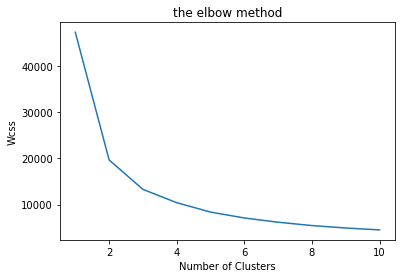

In [22]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()

In [23]:
nclusters = 3  # this is the k in kmeans
km = KMeans(n_clusters=nclusters)
km.fit(X)

y_cluster_kmeans = km.predict(X)
from sklearn import metrics
score = metrics.silhouette_score(X, y_cluster_kmeans)
print(score)

0.42760342
